In [6]:
import torch
import numpy as np
from matplotlib import pyplot as plt

test_path = '/home/yigit/projects/pemp/outputs/comparison/mind_change/freq/bare_pe/simple/'
test_ids = ['1735202437', '1735312809', '1735382722', '1735382813', '1735544243', '1735382859', '1735382829','1735382824', "1735462955"]

training_epochs = 1000000

pemp_losses, cnmp_losses = np.zeros((len(test_ids), training_epochs)), np.zeros((len(test_ids), training_epochs))

for i, test_id in enumerate(test_ids):
    folder_path = test_path + test_id + '/'
    pemp_losses[i] = torch.load(folder_path + 'losses_pe.pt', map_location='cpu', weights_only=False)
    cnmp_losses[i] = torch.load(folder_path + 'losses_bare.pt', map_location='cpu', weights_only=False)

# Colorblind-friendly colors (use perceptually distinct colors)
colors = [
    '#377eb8',  # Blue
    '#ff7f00',  # Orange
    '#4daf4a',  # Green
    '#f781bf',  # Pink
    '#a65628',  # Brown
    '#984ea3',  # Purple
    '#999999',  # Gray
    '#e41a1c',  # Red
    '#dede00'   # Yellow
]
dark_gray = '#4d4d4d'
linestyles = [(0, (3, 1, 1, 1, 1, 1)), (0, (1, 1)), '--', (0, (5, 10)), ':', '-.', '-', (0, (1, 3))]

plots_path = "/home/yigit/projects/pemp/mindchange/plots/comparisons/"

In [2]:
pemp_losses_mean = np.mean(pemp_losses, axis=0)
pemp_losses_std = np.std(pemp_losses, axis=0)

cnmp_losses_mean = np.mean(cnmp_losses, axis=0)
cnmp_losses_std = np.std(cnmp_losses, axis=0)

# smooth with a window of size w
w = 50
pemp_losses_mean = np.convolve(pemp_losses_mean, np.ones(w), 'valid') / w
pemp_losses_std = np.convolve(pemp_losses_std, np.ones(w), 'valid') / w
cnmp_losses_mean = np.convolve(cnmp_losses_mean, np.ones(w), 'valid') / w
cnmp_losses_std = np.convolve(cnmp_losses_std, np.ones(w), 'valid') / w

# sample every 1000 points
sample_rate = 1000
pemp_losses_mean = pemp_losses_mean[::sample_rate]
pemp_losses_std = pemp_losses_std[::sample_rate]
cnmp_losses_mean = cnmp_losses_mean[::sample_rate]
cnmp_losses_std = cnmp_losses_std[::sample_rate]

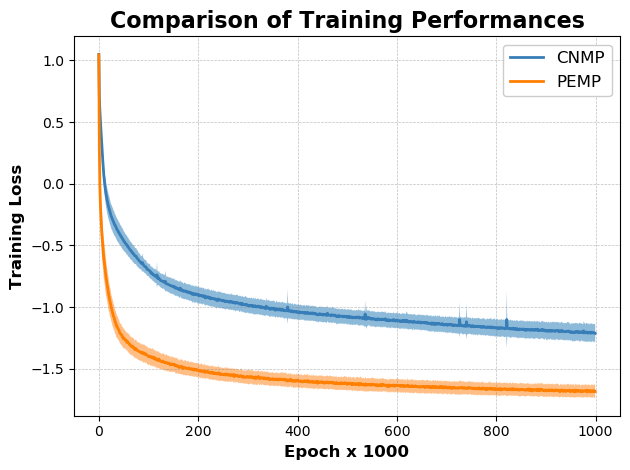

In [7]:
plt.plot(np.arange(training_epochs//sample_rate), cnmp_losses_mean, color=colors[0], linewidth=2.0, label='CNMP')
plt.plot(np.arange(training_epochs//sample_rate), pemp_losses_mean, color=colors[1], linewidth=2.0, label='PEMP')

plt.fill_between(np.arange(training_epochs//sample_rate), cnmp_losses_mean-cnmp_losses_std, cnmp_losses_mean+cnmp_losses_std, alpha=0.5)
plt.fill_between(np.arange(training_epochs//sample_rate), pemp_losses_mean-pemp_losses_std, pemp_losses_mean+pemp_losses_std, alpha=0.5)

plt.title("Comparison of Training Performances", fontsize=16, fontweight='bold')
plt.xlabel("Epoch x 1000", fontsize=12, fontweight='bold')
plt.ylabel("Training Loss", fontsize=12, fontweight='bold')

plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend(loc='best', frameon=True, framealpha=0.99, fontsize=12)
plt.tight_layout()
plt.savefig(f'{plots_path}/comp_cnmp_pemp_tr_loss.svg', format='svg', dpi=300)
plt.show()